# Multi Input Variables LSTM/RNN

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from statsmodels.tools.eval_measures import rmse
from sklearn.preprocessing import MinMaxScaler
from keras import Input
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.preprocessing.sequence import TimeseriesGenerator
import warnings
import urllib

warnings.filterwarnings("ignore")

# 데이터 다운로드
confirmed_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
death_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
recovered_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')

confirmed_table = confirmed_df.melt(id_vars=["Province/State", "Country/Region", "Lat", "Long"], var_name="Date", value_name="Confirmed").fillna('').drop(['Lat', 'Long'], axis=1)
death_table = death_df.melt(id_vars=["Province/State", "Country/Region", "Lat", "Long"], var_name="Date", value_name="Deaths").fillna('').drop(['Lat', 'Long'], axis=1)
recovered_table = recovered_df.melt(id_vars=["Province/State", "Country/Region", "Lat", "Long"], var_name="Date", value_name="Recovered").fillna('').drop(['Lat', 'Long'], axis=1)

full_table = confirmed_table.merge(death_table).merge(recovered_table)

full_table['Date'] = pd.to_datetime(full_table['Date'])

In [0]:
def get_time_series(country):
    # for some countries, data is spread over several Provinces
    if full_table[full_table['Country/Region'] == country]['Province/State'].nunique() > 1:
        country_table = full_table[full_table['Country/Region'] == country]
        country_df = pd.DataFrame(pd.pivot_table(country_table, values = ['Confirmed', 'Deaths', 'Recovered'],
                              index='Date', aggfunc=sum).to_records())
        return country_df.set_index('Date')[['Confirmed', 'Deaths', 'Recovered']]
    df = full_table[(full_table['Country/Region'] == country) 
                & (full_table['Province/State'].isin(['', country]))]
    return df.set_index('Date')[['Confirmed', 'Deaths', 'Recovered']]

Populating the interactive namespace from numpy and matplotlib


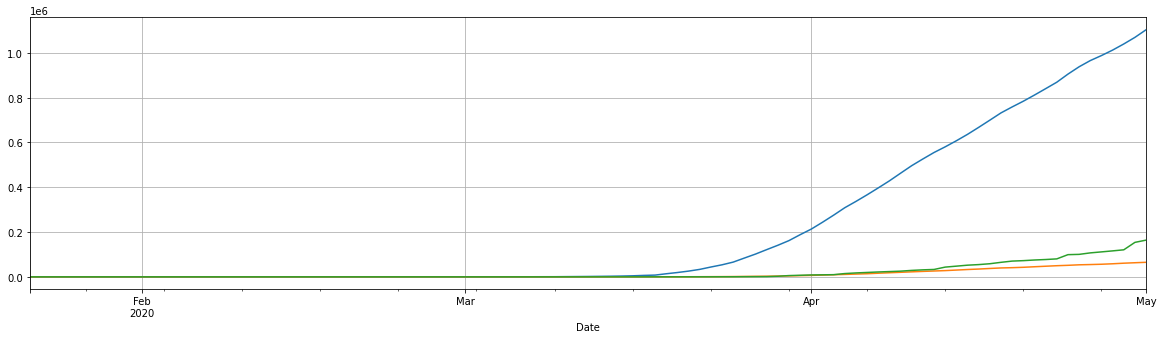

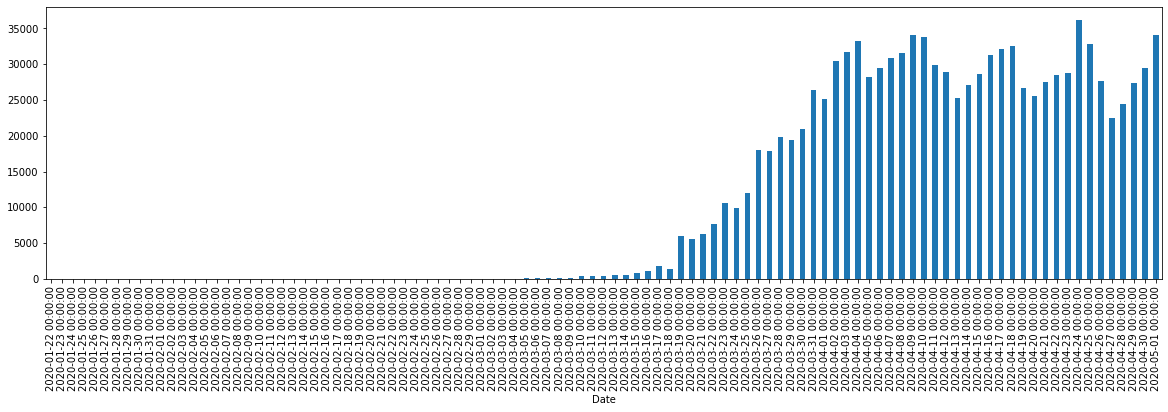

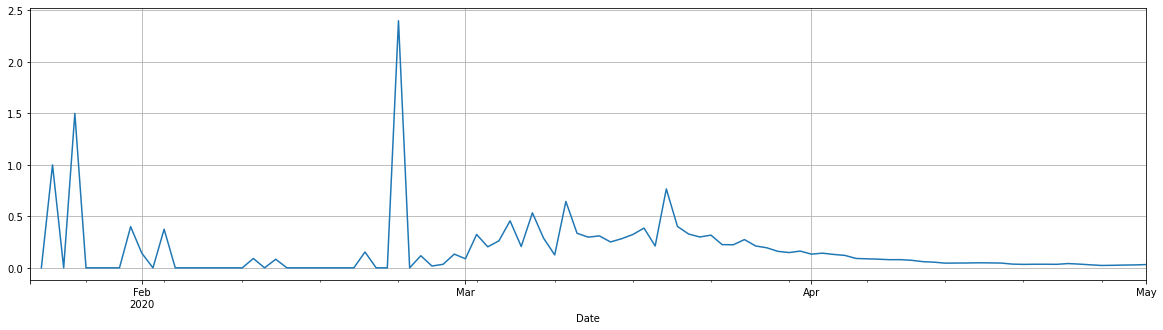

In [0]:
country = 'US'
df_us = get_time_series(country)
if len(df_us) > 1 and df_us.iloc[-2,0] >= df_us.iloc[-1,0]:
    df_us.drop(df_us.tail(1).index,inplace=True)
#df_us.head(50)

%pylab inline
pylab.rcParams['figure.figsize'] = (20, 5)

# US
df_us.Confirmed.plot(grid=True)
df_us.Deaths.plot(grid=True)
df_us.Recovered.plot(grid=True)
plt.show()

# Don't need apply() function since there are built-in functions, pct_change() and diff()
# http://www.leejungmin.org/post/2018/04/21/pandas_apply_and_map/
df_us['Pct_Change'] = df_us.Confirmed.pct_change()
df_us['Daily_Confirmed'] = df_us.Confirmed.diff()

df_us.Daily_Confirmed.plot(kind='bar')
plt.show()

df_us.Pct_Change.plot(grid=True)
plt.show()

Populating the interactive namespace from numpy and matplotlib


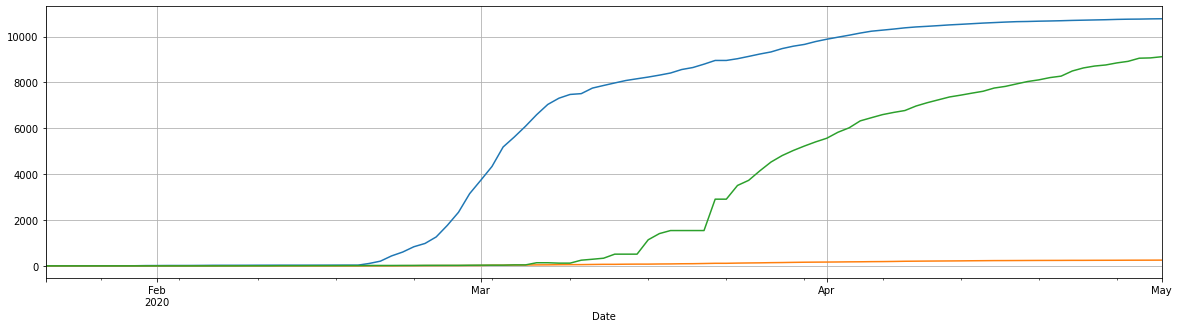

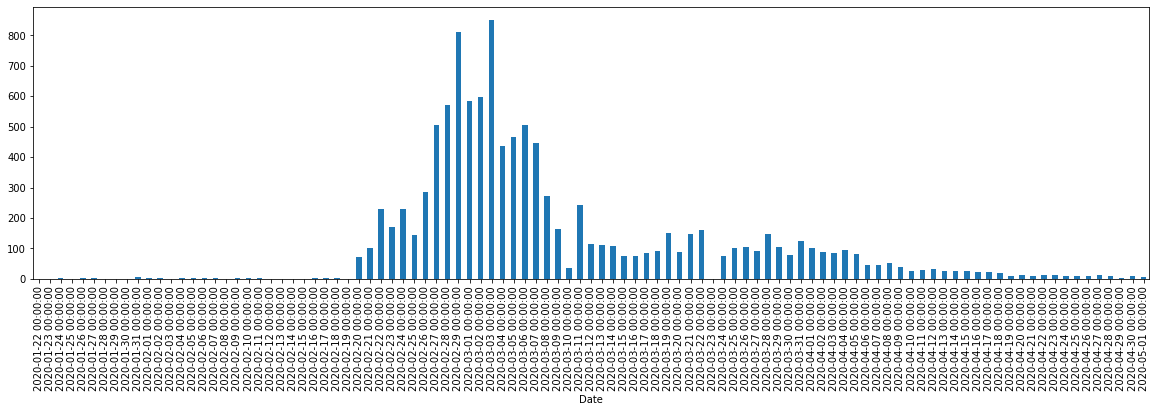

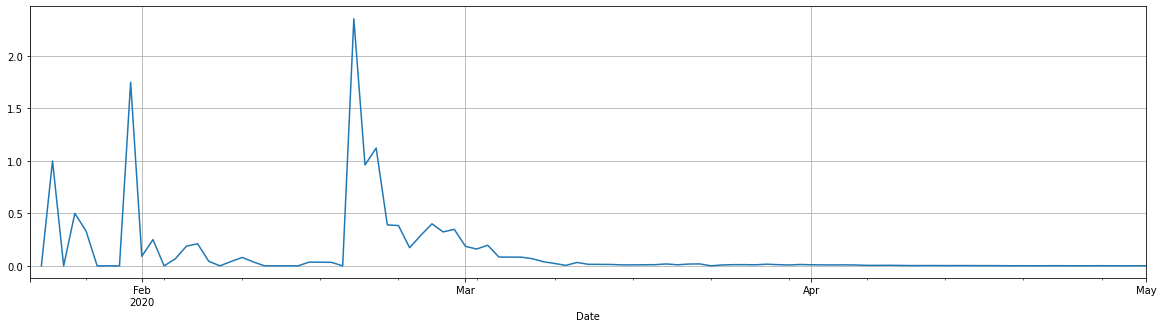

In [0]:
country = 'Korea, South'
df_korea = get_time_series(country)
if len(df_korea) > 1 and df_korea.iloc[-2,0] >= df_korea.iloc[-1,0]:
    df_korea.drop(df_korea.tail(1).index,inplace=True)
#df_korea.head(50)

%pylab inline
pylab.rcParams['figure.figsize'] = (20, 5)

# Korea
df_korea.Confirmed.plot(grid=True)
df_korea.Deaths.plot(grid=True)
df_korea.Recovered.plot(grid=True)
plt.show()

# Don't need apply() function since there are built-in functions, pct_change() and diff()
# http://www.leejungmin.org/post/2018/04/21/pandas_apply_and_map/
df_korea['Pct_Change'] = df_korea.Confirmed.pct_change()
df_korea['Daily_Confirmed'] = df_korea.Confirmed.diff()

df_korea.Daily_Confirmed.plot(kind='bar')
plt.show()

df_korea.Pct_Change.plot(grid=True)
plt.show()

Populating the interactive namespace from numpy and matplotlib


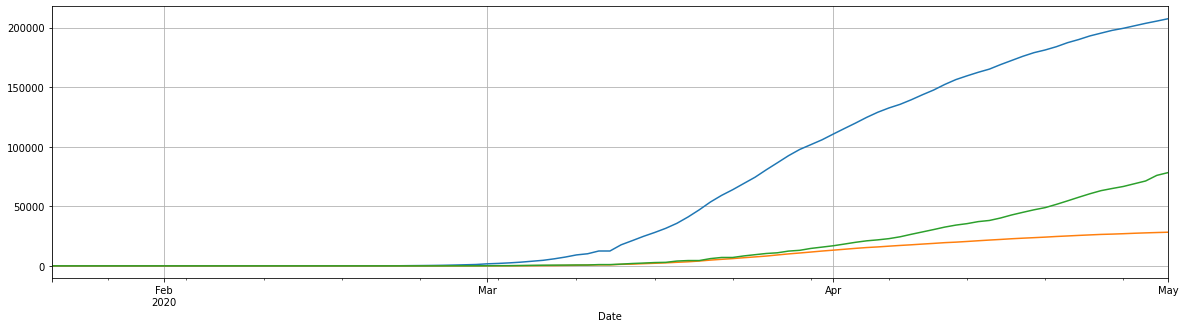

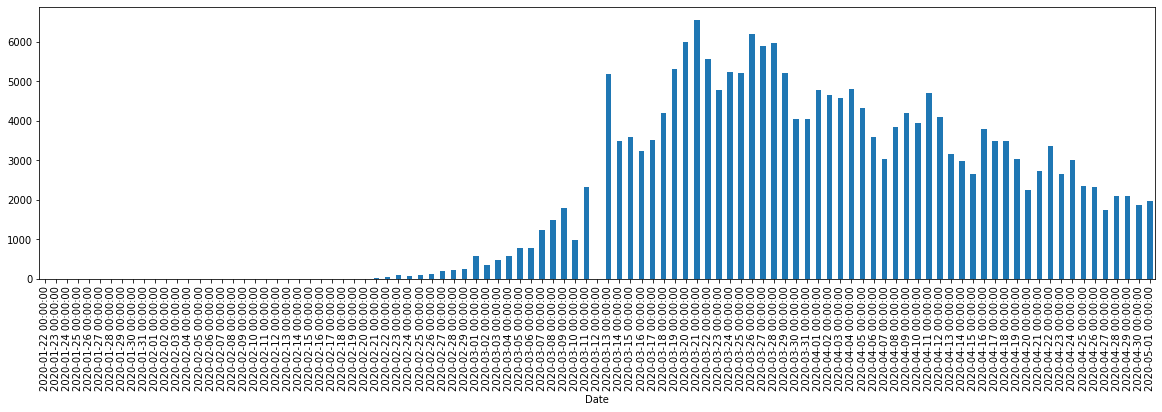

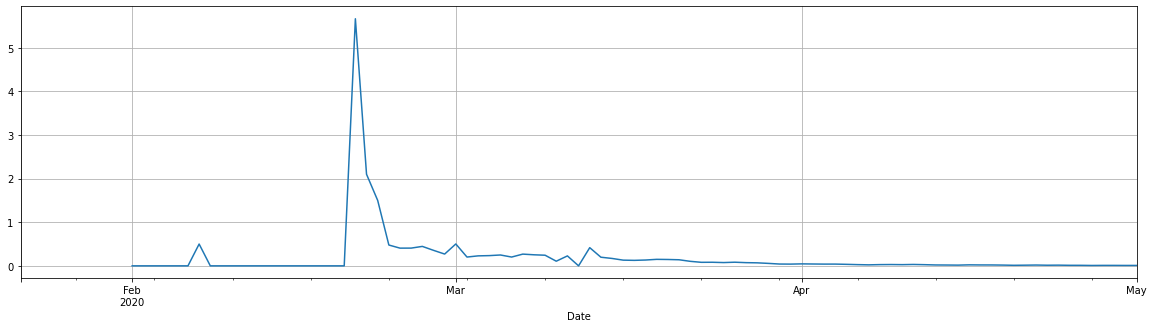

In [0]:
country = 'Italy'
df_italy = get_time_series(country)
if len(df_italy) > 1 and df_italy.iloc[-2,0] >= df_italy.iloc[-1,0]:
    df_italy.drop(df_italy.tail(1).index,inplace=True)
#df_italy.head(50)

%pylab inline
pylab.rcParams['figure.figsize'] = (20, 5)

# italy
df_italy.Confirmed.plot(grid=True)
df_italy.Deaths.plot(grid=True)
df_italy.Recovered.plot(grid=True)
plt.show()

# Don't need apply() function since there are built-in functions, pct_change() and diff()
# http://www.leejungmin.org/post/2018/04/21/pandas_apply_and_map/
df_italy['Pct_Change'] = df_italy.Confirmed.pct_change()
df_italy['Daily_Confirmed'] = df_italy.Confirmed.diff()

df_italy.Daily_Confirmed.plot(kind='bar')
plt.show()

df_italy.Pct_Change.plot(grid=True)
plt.show()

In [0]:
# df_italy = df_italy.dropna()
# df_italy.replace({'Pct_Change': np.inf}, {'Pct_Change': 0})
# type(df_italy['Pct_Change'][0])
# df_italy
# df_train = df_italy[:] #여기 조정하면 국가 변경 가능
# df_train = df_train.dropna()
# df_train= df_train[1:]

In [0]:
np.set_printoptions(threshold=20)

# 하나의 나라만 가지고 학습을 할지
# 여러 나라 데이터를 모두 가지고 학습을 할지
# 여러 나라 데이터를 패턴 별로 분류해서 학습을 할지 결정 필요
# 위도/경도 정보를 통해 날씨/온도가 필요할 수도
df_train = df_us[:] #여기 조정하면 국가 변경 가능
df_train = df_train.dropna()
df_train = df_train[1:]
print(df_train.columns)

# df_train = df_train.drop(["SNo", "Province/State", "Country/Region", "Last Update"], 1)
# df_train = df_train.dropna()

df_train.tail(10)

# 7일치 데이터를 입력해서 다음 시간을 예측하는 모델
n_input = 7
# 입력 변수는 다섯 개 (Confirmed, Deaths, Recovered, Pct_Change, Daily_Confirmed)
# 입력 변수가 여러 개이면 Scaler도 각각에 맞게 골라야 함
n_features = 5

train, test = df_train[:], df_train[-n_input:]
# print(test.shape)
print('len_train : ' + str(len(train)))
print('len_test : ' + str(len(test)))

# 정규화
scaler = MinMaxScaler()
scaler.fit(train)
train = scaler.transform(train)
test = scaler.transform(test)

# print(test.shape)
# print(train)
# print(test)

generator = TimeseriesGenerator(train, train[:, 0:1], length=n_input, batch_size=5)
print(len(generator))
x, y = generator[0]
# print("x: %s" % (x))
# print("y: %s" % (y))
print(x.shape)
print(y.shape)

# Keras의 NN 생성은 매우 쉬움 (Tensorflow에 비해 - 비교해 보기 바람)
# https://www.tensorflow.org/api_docs/python/tf/keras/layers/LSTM
model = Sequential()
# 출력이 200차원인 LSTM Network
model.add(LSTM(200, activation='relu', input_shape=(n_input, n_features)))
# 과적합을 막기 위한 Dropout 비율 15%는 Network를 끊어버림
model.add(Dropout(0.15))
# 200차원의 LSTM NN 결과를 단일(1차원) 출력으로 줄임
model.add(Dense(1))
# Adam Optimzer(이런게 있다고 알아두면 됨)
# MSE(Mean Square Error) - 에러 함수를 평균 제곱의 합으로 설정 (RMSE 등이 있음)
model.compile(optimizer='adam', loss='mse')

# 100 차례 학습을 반복
model.fit_generator(generator, epochs=20)

Index(['Confirmed', 'Deaths', 'Recovered', 'Pct_Change', 'Daily_Confirmed'], dtype='object')
len_train : 99
len_test : 7
19
(5, 7, 5)
(5, 1)
Epoch 1/20
19/19 [==============================] - 0s 26ms/step - loss: 0.0853
Epoch 2/20
19/19 [==============================] - 0s 12ms/step - loss: 0.0039
Epoch 3/20
19/19 [==============================] - 0s 12ms/step - loss: 0.0018
Epoch 4/20
19/19 [==============================] - 0s 12ms/step - loss: 6.4395e-04
Epoch 5/20
19/19 [==============================] - 0s 12ms/step - loss: 0.0011
Epoch 6/20
19/19 [==============================] - 0s 12ms/step - loss: 9.7606e-04
Epoch 7/20
19/19 [==============================] - 0s 13ms/step - loss: 0.0017
Epoch 8/20
19/19 [==============================] - 0s 12ms/step - loss: 0.0027
Epoch 9/20
19/19 [==============================] - 0s 12ms/step - loss: 0.0032
Epoch 10/20
19/19 [==============================] - 0s 11ms/step - loss: 0.0025
Epoch 11/20
19/19 [==============================]

In [0]:
predicted_list = []

for i in range(len(train)-n_input):
  batch = train[i:i+n_input].reshape((1, n_input, n_features))
  predicted = np.array([model.predict(batch)[0][0], 0, 0, 0, 0])
  predicted = scaler.inverse_transform(predicted.reshape(1, -1))  # n_input==7
  # print(predicted)
  predicted_list.append(predicted[0][0])
print(predicted_list)
len(predicted_list)

[8823.33371201623, 8327.018481781706, 7385.918792863376, 9621.264735775998, 9538.198689993469, 9880.483744499272, 9706.58961401507, 9215.521698850205, 9410.398923555387, 9400.78090128023, 8924.338874887673, 9374.456973448394, 9163.429816052316, 9241.813768717459, 9100.63879553601, 9205.63134236168, 9218.38274960499, 9164.888088689184, 9051.391520672476, 9228.317296173422, 9135.816154493017, 9375.796035637146, 9060.586140321566, 9181.59502192214, 9293.825492765753, 8027.6276073958725, 8880.228953732176, 8548.02437582612, 8256.664791543968, 8314.403755483218, 7444.961877997965, 6346.685268591158, 8636.476472975684, 8593.315097023733, 8994.661734837106, 9309.816135633735, 9578.603838170877, 10252.752282058818, 10249.44008141849, 10361.916166892273, 11291.576791172845, 11298.626650432123, 11389.89560825657, 11191.215981326995, 11546.915294274686, 11914.868619147686, 12138.375877249984, 13960.258879045023, 14584.70478747878, 22335.974686916918, 27421.02378316596, 33042.12115754187, 40822.80

92

In [0]:
df_predict = pd.Series(predicted_list, name='Prediction')
df_predict

0     8.823334e+03
1     8.327018e+03
2     7.385919e+03
3     9.621265e+03
4     9.538199e+03
5     9.880484e+03
6     9.706590e+03
7     9.215522e+03
8     9.410399e+03
9     9.400781e+03
10    8.924339e+03
11    9.374457e+03
12    9.163430e+03
13    9.241814e+03
14    9.100639e+03
15    9.205631e+03
16    9.218383e+03
17    9.164888e+03
18    9.051392e+03
19    9.228317e+03
20    9.135816e+03
21    9.375796e+03
22    9.060586e+03
23    9.181595e+03
24    9.293825e+03
25    8.027628e+03
26    8.880229e+03
27    8.548024e+03
28    8.256665e+03
29    8.314404e+03
30    7.444962e+03
31    6.346685e+03
32    8.636476e+03
33    8.593315e+03
34    8.994662e+03
35    9.309816e+03
36    9.578604e+03
37    1.025275e+04
38    1.024944e+04
39    1.036192e+04
40    1.129158e+04
41    1.129863e+04
42    1.138990e+04
43    1.119122e+04
44    1.154692e+04
45    1.191487e+04
46    1.213838e+04
47    1.396026e+04
48    1.458470e+04
49    2.233597e+04
50    2.742102e+04
51    3.304212e+04
52    4.0822

In [0]:
#df_korea_2 = df_korea.join(temp)
df_output = df_train.copy()
df_output = df_output[n_input:]
len(df_output)
df_output = df_output.reset_index()
df_output_2 = pd.concat([df_output, df_predict], axis=1)
df_output_2.set_index('Date')

,Confirmed,Deaths,Recovered,Pct_Change,Daily_Confirmed,Prediction
Date,,,,,,
2020-01-31,7,0,0,0.400000,2.0,8.823334e+03
2020-02-01,8,0,0,0.142857,1.0,8.327018e+03
2020-02-02,8,0,0,0.000000,0.0,7.385919e+03
2020-02-03,11,0,0,0.375000,3.0,9.621265e+03
2020-02-04,11,0,0,0.000000,0.0,9.538199e+03
2020-02-05,11,0,0,0.000000,0.0,9.880484e+03
2020-02-06,11,0,0,0.000000,0.0,9.706590e+03
2020-02-07,11,0,0,0.000000,0.0,9.215522e+03
2020-02-08,11,0,0,0.000000,0.0,9.410399e+03


In [0]:
len(df_output_2)

92

Populating the interactive namespace from numpy and matplotlib


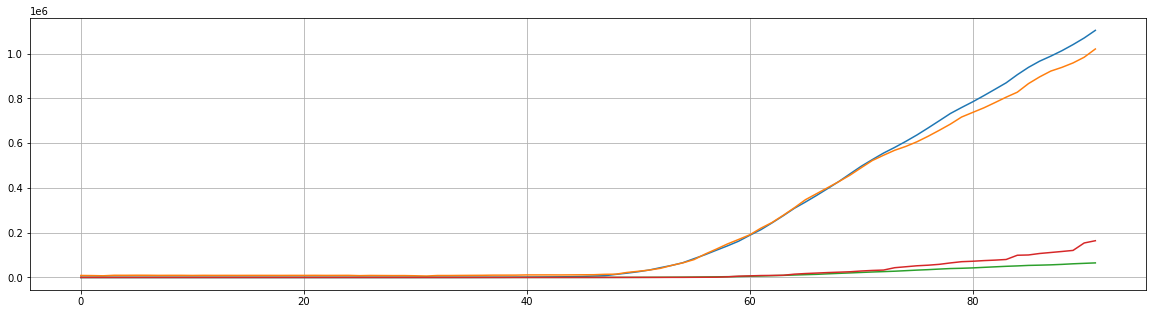

In [0]:
### US
%pylab inline
pylab.rcParams['figure.figsize'] = (20, 5)

df_output_2.Confirmed.plot(grid=True)
df_output_2.Prediction.plot(grid=True)
df_output_2.Deaths.plot(grid=True)
df_output_2.Recovered.plot(grid=True)
plt.show()

Populating the interactive namespace from numpy and matplotlib


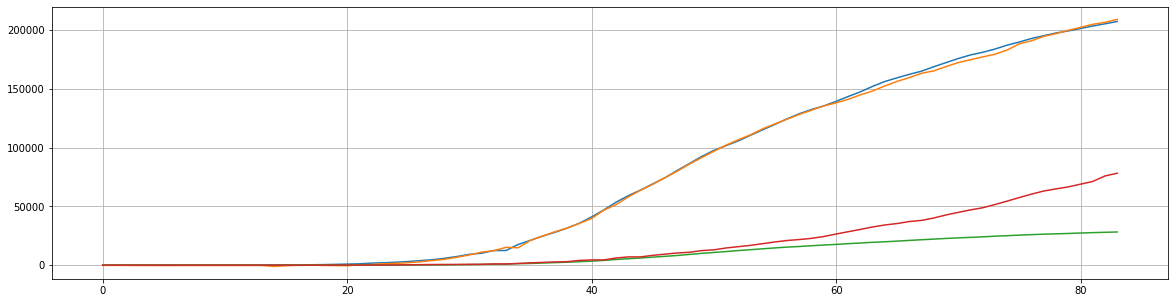

In [0]:
### ITALY
%pylab inline
pylab.rcParams['figure.figsize'] = (20, 5)

df_output_2.Confirmed.plot(grid=True)
df_output_2.Prediction.plot(grid=True)
df_output_2.Deaths.plot(grid=True)
df_output_2.Recovered.plot(grid=True)
plt.show()

Populating the interactive namespace from numpy and matplotlib


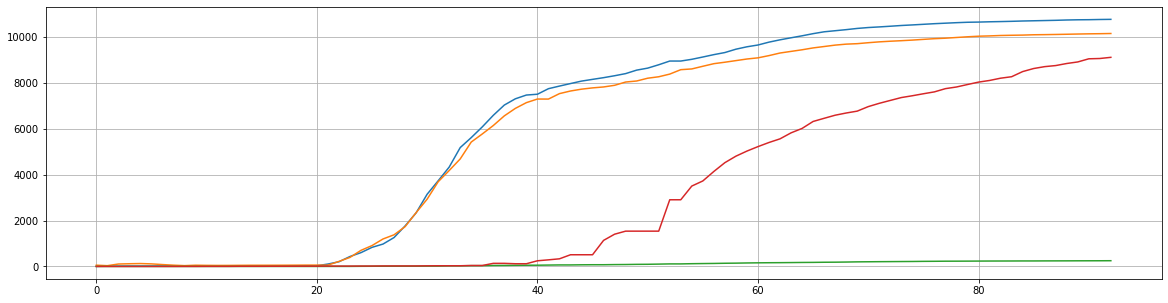

In [0]:
### SOUTH KOREA
%pylab inline
pylab.rcParams['figure.figsize'] = (20, 5)

df_output_2.Confirmed.plot(grid=True)
df_output_2.Prediction.plot(grid=True)
df_output_2.Deaths.plot(grid=True)
df_output_2.Recovered.plot(grid=True)
plt.show()

In [0]:
pd.set_option('display.max_rows', 500)
confirmed_df

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,5/1/20
0,NaN,Afghanistan,33.000000,65.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,...,40,74,84,94,110,110,120,170,174,237,273,281,299,349,367,423,444,484,521,555,607,665,714,784,840,906,933,996,1026,1092,1176,1279,1351,1463,1531,1703,1828,1939,2171,2335
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,104,123,146,174,186,197,212,223,243,259,277,304,333,361,377,383,400,409,416,433,446,467,475,494,518,539,548,562,584,609,634,663,678,712,726,736,750,766,773,782
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,...,230,264,302,367,409,454,511,584,716,847,986,1171,1251,1320,1423,1468,1572,1666,1761,1825,1914,1983,2070,2160,2268,2418,2534,2629,2718,2811,2910,3007,3127,3256,3382,3517,3649,3848,4006,4154
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,133,164,188,224,267,308,334,370,376,390,428,439,466,501,525,545,564,583,601,601,638,646,659,673,673,696,704,713,717,717,723,723,731,738,738,743,743,743,745,745
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,3,3,3,4,4,5,7,7,7,8,8,8,10,14,16,17,19,19,19,19,19,19,19,19,19,19,24,24,24,24,25,25,25,25,26,27,27,27,27,30
5,NaN,Antigua and Barbuda,17.060800,-61.796400,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,3,3,3,7,7,7,7,7,7,7,9,15,15,15,15,19,19,19,19,21,21,23,23,23,23,23,23,23,23,23,24,24,24,24,24,24,24,24,24,25
6,NaN,Argentina,-38.416100,-63.616700,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,301,387,387,502,589,690,745,820,1054,1054,1133,1265,1451,1451,1554,1628,1715,1795,1975,1975,2142,2208,2277,2443,2571,2669,2758,2839,2941,3031,3144,3435,3607,3780,3892,4003,4127,4285,4428,4532
7,NaN,Armenia,40.069100,45.038200,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,235,249,265,290,329,407,424,482,532,571,663,736,770,822,833,853,881,921,937,967,1013,1039,1067,1111,1159,1201,1248,1291,1339,1401,1473,1523,1596,1677,1746,1808,1867,1932,2066,2148
8,Australian Capital Territory,Australia,-35.473500,149.012400,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,32,39,39,53,62,71,77,78,80,84,87,91,93,96,96,96,99,100,103,103,103,102,103,103,103,103,103,103,104,104,104,104,105,106,106,106,106,106,106,106
9,New South Wales,Australia,-33.868800,151.209300,0,0,0,0,3,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,...,669,818,1029,1219,1405,1617,1791,2032,2032,2182,2298,2389,2493,2580,2637,2686,2734,2773,2822,2857,2857,2863,2870,2886,2897,2926,2936,2957,2963,2969,2971,2976,2982,2994,3002,3004,3016,3016,3025,3030
